# microMegas Dislocation Dynamics Simulation: Comprehensive Guide


**Document Version**: 1.0  
**Date**: November 2025  
**Project**: Dislocation Dynamics (DD) Simulation - microMegas  
**Platform**: Windows with MSYS2

---

## Table of Contents

1. [Part 1: Physics Foundations](#part-1-physics-foundations)
2. [Part 2: Project Structure & Organization](#part-2-project-structure--organization)
3. [Part 3: Compilation & Build System](#part-3-compilation--build-system)
4. [Part 4: Execution & Parameter Configuration](#part-4-execution--parameter-configuration)
5. [Part 5: Data Analysis & Interpretation](#part-5-data-analysis--interpretation)
6. [Part 6: Questions to Answer](#part-6-questions-to-answer)

---

# Part 1: Physics Foundations

## 1.1 Introduction to Dislocation Dynamics

### What are dislocations?

Dislocations are linear crystal defects—topological defects in the perfect periodic arrangement of atoms in a crystal lattice. They are fundamental to understanding plastic deformation (permanent shape change) in crystalline materials.

**Two main types:**

1. **Edge dislocation**: A plane of atoms is incompletely filled, creating a step. Characterized by dislocation line perpendicular to slip direction.

2. **Screw dislocation**: The crystal lattice is sheared parallel to the dislocation line, like a twisted crystal helix.

**Why they matter:**

- Pure crystals would have extremely high strength (theoretical yield stress ~ E/10, where E is Young's modulus)
- Real crystals yield at much lower stresses (~E/1000 to E/10000) because dislocations move easily
- Plastic deformation is mediated by dislocation motion
- Dislocation interactions (multiplication, annihilation, forest hardening) govern material hardening

### Burgers Vector

The **Burgers vector** $\mathbf{b}$ characterizes a dislocation and defines:
- The magnitude and direction of atomic displacement across the dislocation
- Units: typically 1-5 Ångströms for metallic crystals
- For copper (FCC): $|\mathbf{b}| \approx 2.55$ Å

For Cu simulation: `VecBurgers = 2.5525 Angstrom`

### Slip Systems

A **slip system** is defined by:
- **Slip plane**: The plane on which dislocation glides
- **Slip direction**: Direction of dislocation motion within the slip plane

**Example for FCC copper:**
- Slip plane: {111} (face diagonals)
- Slip direction: <110> (face diagonals)
- Total: 12 slip systems (4 planes × 3 directions per plane)

For Cu: `Slip%planes = (-1, -1, -1)` and `Slip%Nsystemes = 12`

---

## 1.2 Continuum Mechanics Framework

### Stress and Strain

**Applied stress** $\sigma$ is the external load applied to the crystal (units: MPa or GPa).

**Resolved shear stress** $\tau$ on a slip system is the component of applied stress driving dislocation motion:

$$\tau = \sigma \cdot m \cdot n$$

where:
- $m$ = direction cosine of slip direction (Schmid factor numerator)
- $n$ = normal to slip plane (Schmid factor denominator)
- Maximum Schmid factor ≈ 0.5 for single crystal under uniaxial stress

**Plastic strain** $\gamma$ on a slip system accumulates from dislocation motion:

$$\gamma = \sum_i b_i \cdot \rho_i \cdot L_i$$

where $\rho_i$ is dislocation density, $L_i$ is swept area per unit length.

### Elastic Constants

**Shear modulus** $G$ (also $\mu$):
- For Cu at 0 K: $G = 42.0$ GPa
- Determines elastic energy stored in dislocation stress fields
- Temperature dependent: $G(T) = G_0 - dG/dT \cdot (T - T_0)$

For Cu: `ModuleG0 = 42.0 GPa`, `dmusurdT = 0.0 GPa/K`

**Poisson's ratio** $\nu$:
- Relates normal and transverse strains
- For Cu: $\nu = 0.431$
- Used to compute elastic interaction energies

---

## 1.3 Dislocation Motion & Velocity Laws

### Forces on Dislocations

Several forces drive or resist dislocation motion:

1. **Applied stress force**: $F_{app} = \tau \cdot b$ per unit length
2. **Peierls-Nabarro stress**: Lattice resistance to dislocation motion (friction)
3. **Line tension**: Self-energy of curved dislocation segments
4. **Elastic interaction**: Long-range stress field from other dislocations

### Velocity Laws (Constitutive Relations)

The **velocity law** relates dislocation velocity $v$ to applied stress $\tau$:

#### Athermal viscous law (Law 1):
$$v = \beta (\tau - \tau_P)$$

where:
- $\beta$ = viscous drag coefficient (inverse of friction)
- $\tau_P$ = Peierls stress (lattice friction)
- No temperature dependence

For Cu Law 1: `Coef_visqueux = 1.0D-4`, `Max_friction = 0.0 MPa` (athermal)

#### Thermally activated law (Law 2):
$$v = v_0 \exp\left(-\frac{\Delta G(T, \tau)}{k_B T}\right)$$

where:
- $v_0$ = attempt frequency (pre-exponential)
- $\Delta G(T, \tau)$ = activation energy (temperature and stress dependent)
- Temperature $T = 300$ K for Cu simulation

For Cu Law 2: `Coef_visqueux = 5.5D-5`, `Max_friction = 0.5 MPa`

### Dislocation Character

Dislocations are classified by their **character angle** $\alpha$:

- $\alpha = 0°$: **Screw dislocation** (line parallel to Burgers vector)
- $\alpha = 90°$: **Edge dislocation** (line perpendicular to Burgers vector)
- $0° < \alpha < 90°$: **Mixed dislocation**

Different velocity laws can apply to different characters because screw vs. edge dislocations have different mobility.

For Cu: Different velocity laws for screw (mixed1), edge (mixed2) depending on character.

---

## 1.4 Dislocation Interactions

### Self-energy and Line Tension

A dislocation has elastic self-energy proportional to its length. Curved segments have higher energy → tendency to straighten.

**Line tension** $T$ represents this restoring force:

$$T = \alpha G b^2$$

where $\alpha$ is a geometric factor (~0.5 for screw, ~1.0 for edge).

For Cu: `LINTEN = 1` (DeWit line tension model)

### Forest Hardening & Dislocation Density

When dislocations from different slip systems intersect, they create **obstacles** (junctions). This increases flow stress:

$$\tau = \tau_0 + \alpha G b \sqrt{\rho_{forest}}$$

where:
- $\rho_{forest}$ = density of forest dislocations (obstacles)
- $\alpha \approx 0.3$ (interaction coefficient)
- This is **forest hardening** or **latent hardening**

Simulation tracks: `rau.txt` = dislocation density per slip system

### Dislocation Multiplication

New dislocations are generated by:

1. **Frank-Read sources**: Pre-existing dislocation loops expand under stress
2. **Cross-slip**: Edge dislocations change slip plane
3. **Double cross-slip**: More complex nucleation events

For Cu: Sources defined in `SegCu` with initial density of $2 \times 10^{12}$ m$^{-2}$

---

## 1.5 Strain Hardening Stages

As material deforms, flow stress increases in stages:

**Stage I (Easy glide)**: 
- $\tau \approx \tau_0$ (nearly constant)
- Only primary slip system active
- Low dislocation density

**Stage II (Linear hardening)**:
- $\tau = \tau_0 + \Theta \gamma$
- Multiple slip systems active
- Forest hardening dominates
- $\Theta \approx 0.3 G b$ (hardening rate)

**Stage III (Parabolic hardening)**:
- $\tau = f(\gamma)$ (non-linear)
- Recovery processes activate (cross-slip, annihilation)
- Dislocation density saturates

For Cu: `TAUIII = 30 MPa` (Stage III threshold)

---

## 1.6 Key Output Quantities

### Stress-Strain Response

- **Stress** $\sigma$: Applied external load (MPa)
- **Strain** $\epsilon$: Total deformation (relative elongation, dimensionless)
- **Stress-strain curve**: Shows material hardening behavior

### Dislocation Density Evolution

- **Total dislocation density** $\rho$: Total length of dislocation lines per unit volume (m$^{-2}$)
- **Density per slip system** $\rho_i$: Tracks which systems are active
- **Expected evolution**: $\rho$ increases rapidly at start (Stage II), then saturates (Stage III)

### Slip System Activity

- **Shear strain** $\gamma_i$: Cumulative plastic strain on system $i$
- **Shear strain rate** $\dot{\gamma}_i$: Current rate of slip on system $i$
- **Schmid factor**: Determines which systems are most favorably oriented

### Junctions

- **Junction density**: Number of dislocation entanglements
- **Junction evolution**: Junctions form during deformation, can recover/break

---

# Part 2: Project Structure & Organization

## 2.1 Directory Organization

```
dd/
│
├── bin/                          # Build directory
│   ├── config                    # Generic build rules (platform-independent)
│   ├── Make_DEFS.linux           # Linux compiler settings
│   ├── Make_DEFS.intel           # Intel compiler settings
│   ├── Make_DEFS.macports        # Mac compiler settings
│   ├── Make_DEFS.windows         # Windows/MSYS2 compiler settings (created)
│   ├── makefile                  # Generated: concatenation of Make_DEFS + config
│   ├── mm.exe                    # Compiled batch simulator
│   ├── gmm.exe                   # Compiled interactive simulator (graphics)
│   ├── mmp.exe                   # Compiled MPI parallel simulator
│   ├── cam.exe                   # Compiled trajectory viewer (requires X11)
│   ├── film2para                 # Convert film.bin → ParaView format
│   ├── film2seg                  # Extract configuration from film.bin
│   ├── histo                     # Data mining tool
│   ├── base                      # Vector database generator
│   ├── pavage                    # Polycrystal interface generator
│   └── vtkam_start.py            # Python VTK visualization script
│
├── src/                          # Source code directory
│   ├── simu/                     # Core simulation modules (Fortran)
│   │   ├── 01constantes.F90      # Physical constants
│   │   ├── 02bricamat.f90        # Material brick (elastic constants)
│   │   ├── 03varbase.f90         # Base variables definition
│   │   ├── 04varglob.f90         # Global variables
│   │   ├── 05intergra.F90        # Integration routines (graphics)
│   │   ├── 06debug.f90           # Debugging utilities
│   │   ├── 07init.f90            # Initialization
│   │   ├── 08connec.f90          # Connectivity routines
│   │   ├── 09elasti.f90          # Elastic field computation
│   │   ├── 10dynam.f90           # Dynamics solver
│   │   ├── 11topolo.f90          # Topology (junctions, cross-slip)
│   │   ├── 12contact.f90         # Contact/collision detection
│   │   ├── 13resul.F90           # Results output
│   │   ├── 14bigsave.f90         # Checkpoint/restart
│   │   ├── 15main.f90            # Main program
│   │   ├── carto.f90             # Mapping module
│   │   ├── initconftools.f90     # Configuration initialization
│   │   ├── microstructure.f90    # Microstructure management
│   │   └── nucleation.f90        # Dislocation nucleation
│   │
│   ├── outils/                   # Utility modules (Fortran/C)
│   │   ├── MDCtools.f90          # MDC-specific tools
│   │   └── ... (various utilities)
│   │
│   ├── graph/                    # Graphics library (C/Fortran)
│   │   ├── Graphics/             # Visualization code (requires X11)
│   │   │   ├── graph.c           # Main graphics module
│   │   │   ├── *Cdraw.c          # Drawing functions
│   │   │   ├── *Cwindow_init.c   # Window initialization
│   │   │   └── BlackBG_mac       # Color palette
│   │   └── camera.f90            # Camera/film viewer
│   │
│   └── doc/                      # Documentation
│       ├── CrystalRotation.pdf
│       ├── strain_rate_control.pdf
│       ├── FEexternalstressField.pdf
│       └── HOWTOmakeAfilm.pdf
│
├── in/                           # INPUT directory
│   ├── input.dd                  # Master input file (lists 3 main input files)
│   ├── Cu                        # Material definition (copper)
│   ├── ContCu                    # Control parameters
│   ├── SegCu                     # Initial dislocation configuration
│   ├── couleur.micmeg            # Color palette
│   ├── carto/                    # Cartography files (optional)
│   ├── mM_Control_files/         # Alternative control parameter sets
│   ├── mM_Data_Files/            # Alternative data files
│   ├── mM_Def_files/             # Alternative definitions
│   ├── mM_Materials_files/       # Alternative material definitions
│   ├── mM_Segments_files/        # Alternative segment configurations
│   ├── random                    # Random number seed
│   ├── hosts.dd                  # MPI host file (for parallel runs)
│   └── README                    # Input file documentation
│
├── out/                          # OUTPUT directory (created by simulation)
│   ├── film.bin                  # Trajectory (binary, large file)
│   ├── stat.txt                  # Global statistics (stress, strain, density)
│   ├── gamma.txt                 # Cumulative slip per slip system
│   ├── gammap.txt                # Instantaneous slip rate per slip system
│   ├── rau.txt                   # Dislocation density per slip system
│   ├── raujonc.txt               # Junction density per slip system
│   ├── travapp.txt               # Applied work
│   ├── travint.txt               # Internal work
│   ├── config.dd                 # Final configuration
│   ├── bigsave.bin               # Checkpoint for restart
│   ├── BVD.CFC                   # Burgers vector database
│   ├── slipsys.xml               # Slip system definitions (XML)
│   ├── junctions.xml             # Junction data (XML)
│   ├── resul                     # Gnuplot script for visualization
│   ├── vtk/                      # VTK output files
│   └── README                    # Output file documentation
│
└── exec/                         # Execution directory
    └── (symbolic links or copies of executables)
```

## 2.2 File Relationships

**The three core input files work together:**

```
input.dd (master file)
    ├─→ lists Cu (material)
    │    ├─→ Contains: G, ν, crystal structure, slip systems, velocity laws
    │    └─→ Used by: 02bricamat.f90, 09elasti.f90, 10dynam.f90
    │
    ├─→ lists ContCu (control)
    │    ├─→ Contains: loading rate, temperature, time steps, output frequency
    │    └─→ Used by: 15main.f90, 07init.f90
    │
    └─→ lists SegCu (initial configuration)
         ├─→ Contains: 48 dislocation segments with positions, Burgers vectors
         └─→ Used by: 08connec.f90, initialization routines
```

---

# Part 3: Compilation & Build System

## 3.1 Build System Overview

The microMegas project uses a **modular build system** to support multiple platforms (Linux, Mac, Windows) without code duplication.

### Key Files

| File | Purpose |
|------|---------|
| `config` | Generic build rules, defines all programs (mm, mmp, gmm, cam, etc.) |
| `Make_DEFS.*` | Platform-specific compiler settings, optimization flags |
| `makefile` | Generated: concatenation of Make_DEFS + config, ready to use with `make` |

### How it works

```
Step 1: User chooses platform
    $ make -f config windows

Step 2: config + Make_DEFS.windows are concatenated
    $ cat Make_DEFS.windows config > makefile

Step 3: makefile is generated in bin/ directory

Step 4: User compiles with generated makefile
    $ make mm

Step 5: makefile reads program recipes and compiles
    - Looks up mm_CONTENTS = 01constantes 03varbase 04varglob ... 15main
    - Compiles each module to mm.objs/
    - Links all object files into mm.exe
```

## 3.2 Make_DEFS.windows Explained

```makefile
# Compiler definitions
CC=gcc                    # C compiler
FC=gfortran               # Fortran compiler
MPIFC=mpif90              # MPI Fortran wrapper (optional, not used for mm)

OMP=-fopenmp              # OpenMP flag for parallelization

OPTIM= -O3                # Optimization level 3 (highest, may be slow to compile)

MODULEOPT=-J              # Fortran module output directory flag

# Compilation flags
CFLAGS= -lm               # Link math library
FFLAGS= -ftree-vectorize  # Enable SIMD vectorization

# Graphics (disabled on Windows)
CGRAPHLIB  = -lgfortran -lm   # Minimal graphics lib (X11 not available)
COLORSFILE = BlackBG_mac      # Color palette for visualization

MKL_LIBS   = $(BLAS)          # Optional BLAS/MKL libraries
```

**Why Windows-specific?**
- X11 graphics not available on Windows (removed -L/usr/X11R6/lib64)
- Different path conventions (Windows uses backslash; handled by MSYS2)
- No MPI setup by default (add MPICH separately if needed)

## 3.3 Step-by-Step Compilation on Windows

### Prerequisite: MSYS2 Installation

1. Download MSYS2: https://www.msys2.org/
2. Run installer (default path: `C:\msys64`)
3. Launch **MSYS2 MINGW64** terminal

### Step 1: Install Compilers

In MSYS2 terminal:

```bash
pacman -Syu                                    # Update package manager
pacman -S mingw-w64-x86_64-gcc                # Install GCC
pacman -S mingw-w64-x86_64-gcc-fortran        # Install gfortran
pacman -S make                                # Install make
```

Verify installation:
```bash
gcc --version
gfortran --version
make --version
```

### Step 2: Navigate to Project

```bash
cd /c/Users/GadBwede/Documents/dd/dd/bin
ls -la config Make_DEFS.windows              # Verify files exist
```

### Step 3: Generate Makefile

```bash
make -f config windows
```

Expected output:
```
%% Linking makefile
```

Verify:
```bash
ls -la makefile                   # Should exist now
head -30 makefile               # Should show Make_DEFS.windows content
```

### Step 4: Compile Main Simulator

```bash
make mm
```

This compiles all 15 source modules and links into `mm.exe`. Progress looks like:

```
%% Create directory mm.objs
%% Compiling object mm.objs/01constantes.o
%% Compiling object mm.objs/03varbase.o
%% Compiling object mm.objs/04varglob.o
... (12 more modules)
%% Linking mm.exe
```

Total time: ~30 seconds to 2 minutes (first compile is slower).

### Step 5: Verify Executable

```bash
ls -la mm.exe               # Should be ~10 MB
file mm.exe                # Should show "PE executable"
```

### Optional: Compile Other Programs

```bash
make base                   # Vector database generator
make film2para              # Film to ParaView converter
make film2seg               # Configuration extractor
make histo                  # Data mining tool
```

**Skip graphics programs on Windows:**
```bash
# These will FAIL due to missing X11:
# make cam    # Don't try
# make gmm    # Don't try
```

---

# Part 4: Execution & Parameter Configuration

## 4.1 Running the Simulation

### Basic Execution

In MSYS2 terminal, from `dd/dd/` directory (one level above `bin/`):

```bash
cd /c/Users/GadBwede/Documents/dd/dd
./bin/mm.exe
```

Or from `dd/dd/bin/`:

```bash
cd /c/Users/GadBwede/Documents/dd/dd/bin
./mm.exe
```

### Running in Background (Optional)

```bash
cd /c/Users/GadBwede/Documents/dd/dd
./bin/mm.exe > out/simulation.log 2>&1 &
```

This:
- Redirects stdout to `out/simulation.log`
- Redirects stderr (error messages) to same file
- `&` runs in background, returns to prompt

### Monitor Progress

```bash
tail -f out/simulation.log      # Watch simulation in real-time
# Press Ctrl+C to stop watching
```

Typical output:
```
 === Simulation initialization ===
 Reading input files...
 Cu material parameters loaded: G = 42.0 GPa
 Initial dislocation configuration: 48 segments
 Temperature: 300 K
 
 Step       Time(s)    Strain(%)  Stress(MPa)  Rho(10^12)  DeltaT
 ...
 1000       2.0e-6     0.15       125.3        3.5         5.2e-4
 2000       4.0e-6     0.32       135.6        4.1         4.8e-4
 ...
```

### Typical Simulation Duration

- **Small test** (100 steps): ~1 second
- **Short run** (10,000 steps): ~10-30 seconds
- **Medium run** (100,000 steps): ~3-5 minutes
- **Production** (1,000,000+ steps): hours to days

For Cu simulation: `NSTEP = 10000000` (10 million steps) → ~several hours

---

## 4.2 Input File 1: Material Definition (`Cu`)

Located in `in/Cu`. Defines material properties and dislocation physics.

### Structure: Property - Value - Description

```
1               Nb_phase                # Number of phases (multi-phase not used here)
1               Index_phase             # Phase index

42.0            ModuleG0                # Shear modulus at 0 K (GPa)
                                        # For Cu: 42 GPa (experimental value)
                                        # Determines elastic energy scale
                                        
0.0             dmusurdT                # Shear modulus temperature dependence (GPa/K)
                                        # For Cu: 0 (constant in this range)
                                        
0.431D0         DPOISS                  # Poisson ratio (dimensionless)
                                        # For Cu: 0.431 (FCC metal)
                                        # ν = (1 - 2d/3) / (2(1 - d/3)) where d = anisotropy

30.D6           TAUIII                  # Threshold for Stage III hardening (Pa)
                                        # 30 MPa: stress above which recovery activates
                                        # Set higher for more hardening (Stage II)
                                        
0.9             BETA                    # Cross-slip pre-exponential factor
                                        # Controls probability of cross-slip (screw dislocation behavior)
                                        
0.6             ALPHA                   # Cross-slip stress threshold ratio
                                        # Determines which stress activates cross-slip

CFC             crystal_structure       # Crystal symmetry: CFC (FCC), CC (BCC), HC (HCP)
                                        # For Cu: CFC (Face-Centered Cubic)
                                        
1               Nb_slip_types           # Number of slip system families
                                        # 1 = single type; can define multiple for more complex materials

2.5525          VecBurgers              # Magnitude of Burgers vector (Ångström)
                                        # For Cu: 2.5525 Å (experimental)
                                        # Determines scale of dislocation displacement

-1 -1 -1        Slip%planes             # Reference slip plane (Miller indices)
                                        # For Cu FCC: {111} planes
                                        
-1 0 1          Slip%directions         # Reference slip direction (Miller indices)
                                        # For Cu FCC: <110> directions
                                        
12              Slip%Nsystemes          # Number of slip systems
                                        # FCC has 12: 4 planes × 3 directions
```

### Velocity Laws Definition

Two velocity laws defined for different dislocation mobilities:

**Law 1** (Relaxation):
```
1               Nloi                    # Law index (1 reserved for relaxation)
0               Slip%Arrhenius          # Type: 0 = athermal (no T-dependence)
1.D-4           Slip%Coef_visqueux      # Viscous coefficient (s·Pa/m)
0.              Slip%Max_friction       # Peierls stress (MPa) - lattice friction
```
- Used only for initial relaxation
- Very viscous (slow motion)
- No lattice friction

**Law 2** (Main sliding):
```
2               Nloi                    # Law index
0               Slip%Arrhenius          # Type: athermal
5.5D-5          Slip%Coef_visqueux      # Less viscous than Law 1
0.5             Slip%Max_friction       # 0.5 MPa lattice friction (realistic for Cu)
```
- Used during simulation
- More mobile than Law 1
- Has friction to resist motion

### Modifying Cu file

**To increase hardening:**
- Increase `ModuleG0` → higher elastic energy → more hardening
- Decrease `TAUIII` → activate Stage III recovery earlier
- Increase slip system difficulty (modify Peierls stress)

**To make material softer:**
- Decrease `ModuleG0`
- Increase `TAUIII`
- Decrease Peierls stress

---

## 4.3 Input File 2: Control Parameters (`ContCu`)

Located in `in/ContCu`. Controls loading, temperature, numerical parameters.

### Key Parameters

```
0               SiDeja                  # Simulation status: 0=new, 1=restart
                                        # Set to 1 to continue from previous run

0               Mode_deformation        # Loading mode:
                                        # 0=strain rate (constant dγ/dt)
                                        # 1=carto (cartography mode)
                                        # 2=run carto
                                        # 3=stress rate (constant dσ/dt)
                                        # 4=constant stress
                                        # 5=fatigue (cyclic)
                                        # Default: 0 (most common)

13.5            Echelle                 # Reference scale (Burgers vector units)
                                        # Size of elementary segment in simulation box
                                        # Larger = coarser spatial resolution

F               Shear                   # Boundary condition:
                                        # T = shear stress on highest Schmid factor system
                                        # F = uniaxial tension/compression
                                        
1.0             Sigma0                  # Initial stress (MPa)
                                        # Usually 0 or small value
                                        
0.2D-9          deltat0                 # Elementary time step (seconds)
                                        # 0.2 ns: very small for accuracy
                                        # Smaller dt = more accurate but slower
                                        
1.0D7           SigmaPoint              # Stress rate (MPa/s)
                                        # Only for mode_deformation=3,6,7
                                        # Example: 1.0e7 MPa/s = 10 GPa/s
                                        
20.             EpsilonPoint            # Strain rate (s^-1)
                                        # For mode_deformation=0 (constant rate)
                                        # 20 s^-1: very high (high-speed deformation)
                                        # Typical: 0.001 - 1000 s^-1
                                        
1.5             RAID                    # Apparent Young modulus (GPa)
                                        # Effective E = 2G(1+ν) ≈ 1.5 × 42 = 63 GPa for Cu
                                        # Used for strain control calculations

T               GLDEV                   # Cross-slip activation: T=yes, F=no
                                        # If T: screw dislocations can change slip plane
                                        # If F: only primary slip active
                                        
F               key_nucleation          # Nucleation: T=yes, F=no
                                        # If T: new dislocations nucleate from sources
                                        # If F: only initial dislocations move
                                        
0 0 1           Tensile_axis            # Loading direction (Miller indices)
                                        # (0,0,1) = [001] direction
                                        # (1,1,1) = [111] direction (most stressed for FCC)
                                        
300.            Temperature             # Temperature (Kelvin)
                                        # 300 K ≈ room temperature
                                        # Affects thermal activation

100             Facteur_Depmax          # Max displacement per step (Burgers units)
                                        # Safety factor to prevent unrealistic jumps
                                        # 100 × b_scale ≈ reasonable for stability

50              NstatControl            # Number of steps for averaging control
                                        # Smooths noisy stress calculations

0               relax_TL                # Relaxation steps (line tension only)
100             relax_INT               # Relaxation steps (internal stress, no load)
100             relax_reac              # Relaxation steps (with reactions allowed)
                                        # Initial equilibration to remove artificial stresses

10000000        NSTEP                   # Total number of steps to simulate
                                        # 10 million steps

10              Period                  # Recalculate forces every N steps
                                        # 10 = recalculate forces every 10 steps

10              KRC                     # Recalculate long-range stress every N steps
                                        # Less frequently than forces (expensive)

50              KISAUVE                 # Save configuration every N steps
200             KSTATS                  # Write stat.txt every N steps
200             KKIM                    # Write film.bin every N steps
```

### Modifying ContCu file

**For quick test:**
```
10000           NSTEP                   # Reduce steps (instead of 10000000)
```

**For higher strain rate:**
```
100.            EpsilonPoint            # Increase from 20 to 100 s^-1
```

**For lower temperature (harder material):**
```
100.            Temperature             # Reduce from 300 to 100 K
```

**To enable cross-slip:**
```
T               GLDEV                   # Change from F to T
```

---

## 4.4 Input File 3: Initial Dislocation Configuration (`SegCu`)

Located in `in/SegCu`. Defines 48 initial dislocation segments.

### Format

```
Header section:
1 1 1 1 1 1 1 1 1 1 1 1     # Slip system flags (12 ones = all 12 systems active)
48                          # Total number of dislocation segments

Simulation box dimensions:
3632 4016 4816              # Box size in lattice units (x, y, z)

Segment data (48 rows):
Seg#  X1    Y1    Z1   Char  SysNo  DirX  DirY  DirZ  ChrX  ChrY  Pinned  Src1 Src2
1     2178  1990  3748  670   7      -3    -3    -1    -1    F       0    0
2     838   654   2408  670   15     -1    -1    -1    -1    F       0    0
...
```

**Fields:**
- `Seg#`: Segment index (1-48)
- `X1, Y1, Z1`: Position of segment midpoint (lattice units)
- `Char`: Character angle (0=screw, 90=edge, intermediate=mixed)
- `SysNo`: Slip system number (1-12 for FCC Cu)
- `DirX, DirY, DirZ`: Burgers vector direction (normalized)
- `ChrX, ChrY, ChrZ`: Dislocation line direction
- `Pinned`: 0=free, 1=pinned to boundary
- `Src1, Src2`: Source identification (not used)

### Configuration Statistics

At end of file:
```
Latice simulation parameter = 1.2183007689602675E-003
Size of the simulation box (microns) = 4.9000000000000004     
Parallelepipede: 4.42 × 4.89 × 5.87 microns
Number of domains: 3
Density (*10^12): 2.0 m^-2
Length of sources: 4.0 microns
Angular dispersion: 0.304 rad
```

**Key numbers:**
- Box size: ~5 microns (realistic for DD simulations)
- Initial density: 2×10^12 m^-2 (typical for worked Cu)
- 48 segments distributed to give this density

### Modifying SegCu file

**Generate NEW random configuration:**

Use `confinit` tool:
```bash
cd /c/Users/GadBwede/Documents/dd/dd
./bin/confinit          # Prompts for parameters
# Creates new SegCu file
```

**Adjust initial density:**

Edit density value or modify segment coordinates (requires understanding file format).

---

# Part 5: Data Analysis & Interpretation

## 5.1 Output Files Overview

After simulation runs, `out/` directory contains:

| File | Size | Format | Content |
|------|------|--------|---------|
| `stat.txt` | ~10 MB | Text | Global statistics (1 row per write) |
| `gamma.txt` | ~5 MB | Text | Slip per slip system |
| `rau.txt` | ~5 MB | Text | Dislocation density per system |
| `film.bin` | 100-1000 MB | Binary | Trajectory (segment positions every N steps) |
| `config.dd` | ~1 MB | Binary | Final configuration |
| `bigsave.bin` | ~500 MB | Binary | Checkpoint for restart |

## 5.2 Reading and Interpreting `stat.txt`

### File Structure

```
stat.txt contains 20+ columns:
Col 1:   Step number (0, 1, 2, ...)
Col 2:   Strain ε (plastic strain, %)
Col 3:   Stress σ (MPa)
Col 4:   Density ρ (dislocation density, m^-2)
Col 5:   Strain rate dε/dt (s^-1)
Col 6:   Area swept by screw dislocations (µm²)
Col 7:   Area swept by edge dislocations (µm²)
Col 8:   Density of mobile dislocations (type 1)
Col 9:   Density of dislocations (type 2)
Col 10:  Junction count
... (more columns for advanced quantities)
```

### Example Data

```
Step    Strain(%)  Stress(MPa)  Density(10^12)  Rate(s^-1)   Junctions
0       0.0        1.0          2.0             20.0         5
100     0.15       125.3        3.5             18.5         12
200     0.32       135.6        4.1             17.2         18
500     1.05       155.2        6.3             15.8         35
1000    2.15       168.7        8.9             14.2         52
```

### Stress-Strain Curve

Plot Column 3 (Stress) vs Column 2 (Strain):

```
Stress (MPa)
     |      ╱╱╱ Stage II (linear)
     |     ╱╱╱╱╱╱ Stage I (easy glide)
   160 |   ╱╱ ╱
     |  ╱╱╱╱
   120 |╱╱
     | 
     |________________ Strain (%)
     0    0.5   1.0   1.5   2.0
```

**Interpretation:**
- **Stage I** (low strain): Stress increases slightly (≈ 100-120 MPa)
- **Stage II** (moderate strain): Linear hardening (stress increases steadily)
- **Stage III** (higher strain): Curves (recovery processes activate)

### Dislocation Density Evolution

Plot Column 4 (Density) vs Column 2 (Strain):

**Expected behavior:**
```
Density (10^12 m^-2)
   10 |          ╱╱ (saturates)
    8 |      ╱╱╱╱╱
    6 |   ╱╱╱╱
    4 |  ╱╱
    2 |_________________
     |
     0    0.5   1.0   1.5   2.0   Strain (%)
```

- Initial density: ~2 × 10^12 m^-2
- Rapid increase during Stage II (dislocation multiplication)
- Saturation in Stage III (multiplication ≈ annihilation)

### Strain Rate Evolution

Plot Column 5 vs Column 1 (Step):

Constant strain rate maintained during constant ε̇ loading → should be ~20 s^-1 (or set value).

---

## 5.3 Reading `gamma.txt` (Slip per Slip System)

```
gamma.txt contains 13 columns:
Col 1:  Strain ε (%)
Col 2:  |Slip γ on system 1|
Col 3:  |Slip γ on system 2|
...
Col 13: |Slip γ on system 12|
```

### Interpretation

For FCC under [001] tension:
- Systems with high Schmid factor should slip more
- For [001] loading: maximum Schmid factor ≈ 0.5 on certain systems
- Active vs. inactive systems show which deformation mechanisms dominate

**Example:**
```
Strain   Sys1    Sys2    Sys3    Sys4   ...  Sys12
0.0      0.000   0.000   0.000   0.000        0.000
0.5      0.003   0.001   0.002   0.340        0.001   (Sys4 most active)
1.0      0.008   0.003   0.005   0.680        0.003
```

Shows that **System 4** is most favorably oriented for [001] loading.

---

## 5.4 Reading `rau.txt` (Dislocation Density per System)

```
rau.txt contains 13 columns:
Col 1:   Strain ε (%)
Col 2:   ρ on system 1 (m^-2)
Col 3:   ρ on system 2
...
Col 13:  ρ on system 12
```

### Interpretation

Shows which slip systems accumulate dislocations. Multiply by system volume to get total density on each system.

**Expected pattern:**
- Primary system (highest Schmid factor) accumulates most dislocations → hardening source
- Secondary systems have lower density
- Forest dislocations on secondary systems increase flow stress (latent hardening)

---

## 5.5 Analyzing Binary Files (film.bin)

`film.bin` contains trajectory of all segments at each output step (binary format, not directly readable).

### Convert to ParaView format:

```bash
cd /c/Users/GadBwede/Documents/dd/dd
./bin/film2para
# Creates VTK files in out/vtk/
```

### View in ParaView:

1. Download ParaView (free): https://www.paraview.org/
2. Open ParaView
3. File → Open → select `out/vtk/film_*.vtu`
4. Play animation to visualize dislocation motion

---


# Part 6: Questions to Answer

After running simulations with different parameters, answer these questions based on physics principles and data analysis:

## Question Set 1: Material Physics & Crystal Plasticity

### Q1.1: Stress-Strain Behavior

**Question:** Describe the three stages of work hardening observed in your stress-strain curve for Cu simulation.

**What to find:**
- Plot stress vs. strain from `stat.txt` Column 3 vs. Column 2
- Identify Stage I (low strain), Stage II (linear), Stage III (saturation)
- Measure hardening rates (slopes)

**Expected answer format:**
- Stage I: Stress = ____ to ____ MPa, Strain = 0 to _____% (easy glide)
- Stage II: Linear hardening rate Θ = _____ MPa/% (dislocation density increases ~linearly)
- Stage III: Stress approaches plateau at ≈ _____ MPa (recovery begins)
- Critical transition between stages occurs at σ ≈ _____ MPa (compare to TAUIII = 30 MPa in `Cu` file)

**Physics to explain:**
- Why does stress increase in Stage II? (Forest hardening from dislocation density increase)
- What physical process dominates in Stage III? (Cross-slip, annihilation, recovery)
- How does this compare to experimental Cu data?

---

### Q1.2: Dislocation Density Evolution

**Question:** Plot and interpret dislocation density evolution. Explain why density increases then saturates.

**What to find:**
- Extract density from `stat.txt` Column 4
- Plot ρ vs. strain
- Identify rate of density increase in each stage

**Expected answer format:**
- Initial density: ρ₀ = _____ × 10^12 m^-2
- Maximum density achieved: ρ_max = _____ × 10^12 m^-2
- Strain at saturation: ε_sat = _____% 
- Rate of density increase in Stage II: dρ/dε ≈ _____ × 10^12 m^-2 / %

**Physics to explain:**
- Dislocation multiplication mechanism (Frank-Read sources)
- Why does it saturate? (Annihilation rate = multiplication rate)
- Relationship between ρ and stress: σ ≈ α G b √ρ (Bailey-Hirsch relationship)
- Calculate predicted hardening: Θ_pred = α G b (dρ/dε) = _____ MPa/%, compare to observed

---

### Q1.3: Slip System Activity

**Question:** Analyze which slip systems are active in the [001] tension test and explain using Schmid factor.

**What to find:**
- Read `gamma.txt` Column 2-13 (slip on each of 12 slip systems)
- Calculate Schmid factors for [001] loading direction
- Compare predicted with observed slip activity

**Expected answer format:**
- Most active slip system: System # _____
- Schmid factor for primary system: m = _____
- Schmid factors for other systems: m_other = _____ (typically lower)
- Slip on primary system at final strain: γ_1 = _____
- Slip on most passive system: γ_12 = _____ (should be much smaller)

**Physics to explain:**
- Schmid factor definition: m = (cos λ)(cos φ) where λ = angle between loading axis and slip direction, φ = angle between loading axis and slip plane normal
- For FCC, maximum m ≈ 0.5 (for appropriate loading direction)
- Why does the simulation activate primarily one system?
- What happens if you load along [111] instead of [001]? (different Schmid factors → different active systems)

---

### Q1.4: Forest Hardening & Latent Hardening

**Question:** Explain how dislocations on secondary slip systems (forest) increase the flow stress on primary system.

**What to find:**
- Extract densities per system from `rau.txt`
- Calculate forest density ρ_forest = Σ ρ_i (i ≠ primary)
- Extract total stress σ vs. primary system slip γ_1

**Expected answer format:**
- Primary system density at final strain: ρ_1 = _____ × 10^12 m^-2
- Forest density: ρ_forest = _____ × 10^12 m^-2
- Predicted hardening increase from forest: Δσ_forest = α G b √(ρ_forest) ≈ _____ MPa
- Fraction of total stress from forest hardening: Δσ_forest / σ_total ≈ _____% 

**Physics to explain:**
- Why do orthogonal slip systems harden each other? (elastic interaction + junction formation)
- Taylor hardening law: σ = α G b √(Σ ρ_i)
- Difference between primary (self) hardening and latent hardening coefficient
- How does this explain polycrystal behavior vs. single crystal?

---

## Question Set 2: Simulation Parameter Effects

### Q2.1: Strain Rate Effect

**Question:** Simulate at TWO strain rates (20 s^-1 and 100 s^-1) and compare stress-strain curves.

**Procedure:**
1. Run baseline simulation (ε̇ = 20 s^-1, already done)
2. Modify `ContCu`: change `EpsilonPoint` to 100.0
3. Clear outputs: `rm -f out/stat.txt out/gamma.txt out/rau.txt`
4. Re-run: `./bin/mm.exe`
5. Plot both curves on same graph

**Expected answer format:**
- Baseline (ε̇ = 20 s^-1): σ at 1% strain = _____ MPa
- High rate (ε̇ = 100 s^-1): σ at 1% strain = _____ MPa
- Stress increase: Δσ = _____ MPa
- Percentage increase: Δσ/σ_20 ≈ _____ %

**Physics to explain:**
- Why does higher strain rate increase flow stress?
- Temperature dependence: thermal activation energy affects rate sensitivity (Kocks-Mecking model)
- Expected rate sensitivity: m = d(ln σ)/d(ln ε̇) ≈ _____
- Compare to experimental Cu values (typically m ≈ 0.01-0.05)
- Physical mechanism: less time for thermally activated processes at higher rates

---

### Q2.2: Temperature Effect

**Question:** Simulate at TWO temperatures (300 K room temp and 100 K cold) and compare hardening.

**Procedure:**
1. Run baseline (T = 300 K)
2. Modify `ContCu`: change `Temperature` to 100.0
3. Clear outputs and re-run
4. Compare stress-strain curves

**Expected answer format:**
- Room temp (T = 300 K): σ at 1% strain = _____ MPa
- Cold (T = 100 K): σ at 1% strain = _____ MPa
- Stress increase at low T: Δσ = _____ MPa
- Relative increase: Δσ/σ_300K ≈ _____ %

**Physics to explain:**
- Why is cold material stronger?
- Thermally activated processes at low T: less easy cross-slip, more lattice friction
- Kocks-Mecking analysis: activation energy ΔG ≈ _____ eV
- Temperature dependence of yield stress: σ(T) relationship
- Comparison to real Cu (DBTT - ductile-brittle transition temperature, not relevant for Cu but shows T effects)

---

### Q2.3: Cross-Slip Effect

**Question:** Run simulations WITH and WITHOUT cross-slip enabled and compare dislocation density evolution.

**Procedure:**
1. Run with cross-slip: `GLDEV = T` (default)
2. Run without: modify `ContCu` to `GLDEV = F`, clear outputs, re-run
3. Compare `rau.txt` total density

**Expected answer format:**
- With cross-slip: final ρ = _____ × 10^12 m^-2
- Without cross-slip: final ρ = _____ × 10^12 m^-2
- Ratio: ρ_no-CS / ρ_with-CS = _____
- Stage II hardening rate: Θ_with-CS = _____ MPa/%, Θ_no-CS = _____ MPa/%

**Physics to explain:**
- What is cross-slip and why is it important?
- Cross-slip allows screw dislocations to change slip plane → reduces entanglement → recovery
- Without cross-slip: higher junction density, more hardening, higher stresses
- Relationship to Stage III: cross-slip IS the Stage III recovery mechanism
- Material classification: recoverable (Cu) vs. non-recoverable (Ni) materials

---

### Q2.4: Material Hardness Variation

**Question:** Modify material parameters and predict effect on hardening.

**Procedure:**
1. **Baseline**: Run with Cu parameters (G = 42 GPa)
2. **Soft metal**: Modify `Cu` file: `ModuleG0 = 30.0` (reduce stiffness), re-run
3. **Hard metal**: Modify: `ModuleG0 = 60.0` (increase stiffness), re-run
4. Compare all three stress-strain curves

**Expected answer format:**
- Soft (G = 30 GPa): σ at 1% strain = _____ MPa
- Baseline (G = 42 GPa): σ at 1% strain = _____ MPa
- Hard (G = 60 GPa): σ at 1% strain = _____ MPa
- Hardening rate ratio: Θ_hard / Θ_soft = _____

**Physics to explain:**
- Hardening rate proportional to G: Θ ∝ G b (from Taylor hardening)
- Why does G affect stress level?
- Predicted scaling: σ ∝ G (approximately, at same strain)
- Real vs. ideal: other factors (Poisson ratio, line tension) also affect behavior

---

## Question Set 3: Dislocation Microstructure

### Q3.1: Junction Formation

**Question:** Analyze junction statistics during deformation.

**What to find:**
- Extract junction count from `stat.txt` (column containing junction data)
- Plot junctions vs. strain

**Expected answer format:**
- Initial junctions: N_j,0 = _____
- Final junctions: N_j,final = _____
- Rate of junction formation: dN_j/dε ≈ _____ junctions/%
- Peak junction density during deformation: N_j,max = _____

**Physics to explain:**
- How do junctions form? (collision of dislocations on different slip systems)
- Junction strength: do they trap dislocations or are they transient?
- Collinear annihilation: when do junctions dissolve?
- Importance to hardening: junction strength vs. density contribution

---

### Q3.2: Mobile vs. Immobile Dislocations

**Question:** Distinguish mobile and immobile dislocation contributions to hardening.

**What to find:**
- `stat.txt` should have separate columns for mobile and immobile densities
- Analyze how these evolve during deformation

**Expected answer format:**
- Initial mobile fraction: f_mobile,0 = _____
- Final mobile fraction: f_mobile,final = _____
- Average velocity of mobile dislocations: v̄ ≈ _____ nm/s
- Waiting segment behavior: explain why some dislocations stop

**Physics to explain:**
- Why do dislocations immobilize?
- Long-range back-stress from dislocation forests
- Dragging effects: viscous vs. athermal regimes
- Implication for material behavior at different temperatures/rates

---

## Question Set 4: Comparison & Validation

### Q4.1: Validation Against Experiments

**Question:** Compare your simulation results with experimental data for copper.

**Research required:**
- Find experimental stress-strain curve for Cu at room temperature
- Compare yield stress, hardening rates, saturation stress

**Expected answer format:**
- Simulation: σ_yield ≈ _____ MPa, Θ_stage-II ≈ _____ MPa/%
- Experiment: σ_yield ≈ _____ MPa, Θ_stage-II ≈ _____ MPa/%
- Agreement: _____ % (ratio or difference)
- Possible discrepancies: discuss

**Physics to explain:**
- Sources of difference: initial conditions, boundary effects, finite size effects
- Simulation: perfect crystal, no grain boundaries, no defects
- Real Cu: polycrystalline, impurities, precipitates, stored dislocations
- Scale effects: simulation box ~5 µm (very small compared to real grain sizes ~100 µm)

---

### Q4.2: Physical Interpretation Summary

**Question:** Write a comprehensive summary explaining the stress-strain behavior from first principles.

**Checklist:**
- [ ] Initial dislocation configuration and why it matters
- [ ] Schmid factor and slip system selection
- [ ] Stage II linear hardening mechanism (forest hardening)
- [ ] Dislocation density evolution (multiplication vs. annihilation)
- [ ] Role of cross-slip and Stage III recovery
- [ ] Temperature and strain rate effects
- [ ] Comparison between simulation predictions and physical expectations

**Expected length:** 1-2 pages with sketches and quantitative data

---

# Summary & Quick Reference

## Quick Command Reference

```bash
# Setup (one-time)
cd /c/Users/GadBwede/Documents/dd/dd/bin
make -f config windows
make mm

# Run simulation
cd /c/Users/GadBwede/Documents/dd/dd
./bin/mm.exe

# Modify and re-run
# Edit in/Cu or in/ContCu or in/SegCu
rm -f out/stat.txt out/gamma.txt out/rau.txt
./bin/mm.exe

# Analyze
python analyze_sim.py          # Create plots
./bin/film2para                # Convert to ParaView
```

## Key Physical Parameters

| Parameter | Symbol | Value (Cu) | Units | Meaning |
|-----------|--------|-----------|-------|---------|
| Shear modulus | G | 42 | GPa | Elastic stiffness |
| Poisson ratio | ν | 0.431 | - | Elastic coupling |
| Burgers vector | b | 2.55 | Å | Dislocation size |
| Initial density | ρ₀ | 2.0 | 10^12 m^-2 | Initial defects |
| Temperature | T | 300 | K | Thermal activation |
| Strain rate | ε̇ | 20 | s^-1 | Deformation speed |
| Peierls stress | τ_P | 0.5 | MPa | Lattice friction |
| Cross-slip | - | Yes | - | Recovery mechanism |

---

**End of Guide**



C:\Users\GadBwede\AppData\Local\Temp\ipykernel_24328\1084018160.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('C:/Users/GadBwede/Documents/dd/dd/out/stat.txt', delim_whitespace=True).to_numpy()
C:\Users\GadBwede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\GadBwede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\GadBwede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_

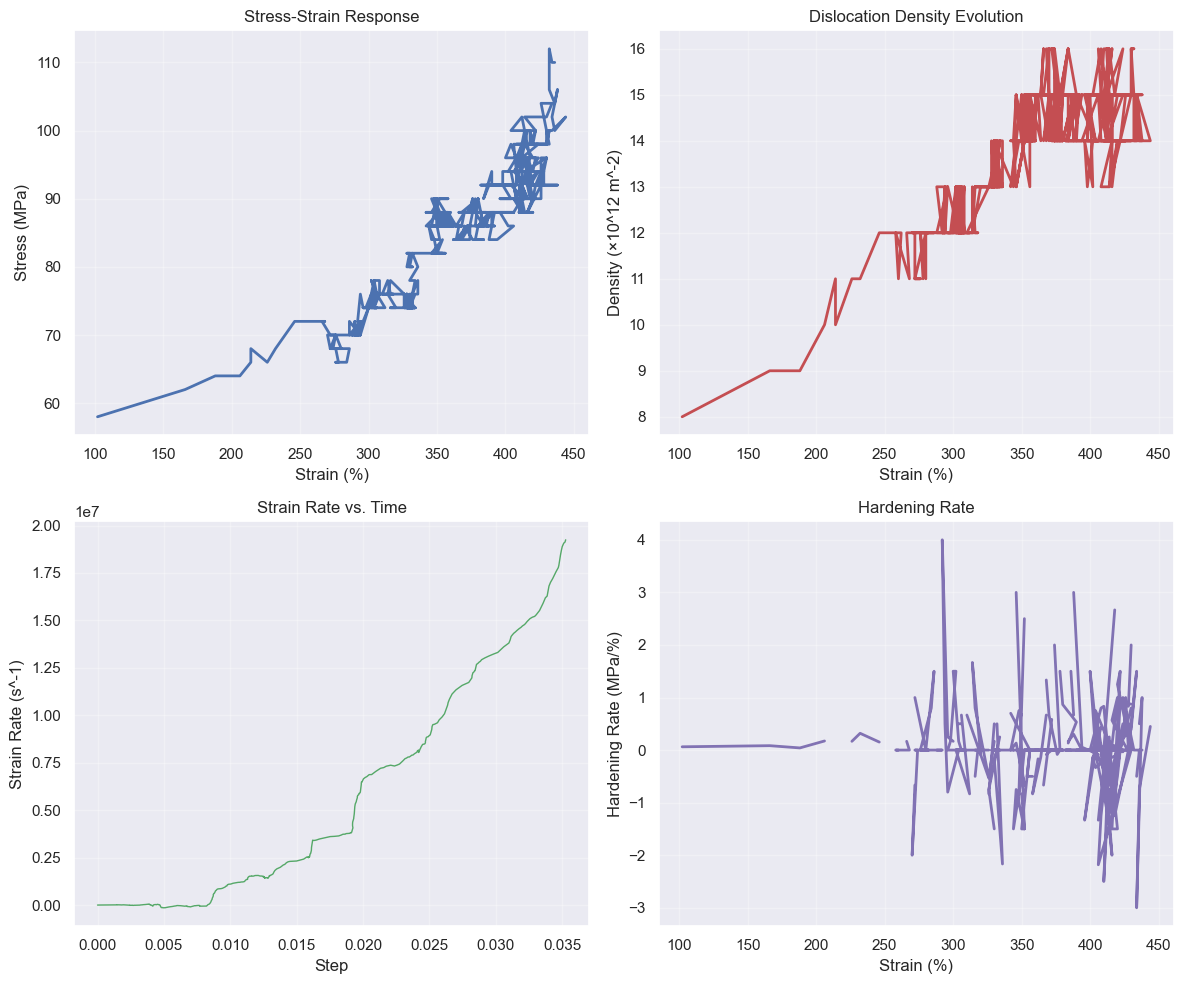

In [4]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()

# Read stat.txt
data = pd.read_csv('C:/Users/GadBwede/Documents/dd/dd/out/stat.txt', delim_whitespace=True).to_numpy()

strain = data[:, 1]      # Column 2 (%)
stress = data[:, 2]      # Column 3 (MPa)
density = data[:, 3]     # Column 4 (10^12 m^-2)
rate = data[:, 4]        # Column 5 (s^-1)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Stress-Strain curve
axes[0, 0].plot(strain, stress, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Strain (%)')
axes[0, 0].set_ylabel('Stress (MPa)')
axes[0, 0].set_title('Stress-Strain Response')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Dislocation density evolution
axes[0, 1].plot(strain, density, 'r-', linewidth=2)
axes[0, 1].set_xlabel('Strain (%)')
axes[0, 1].set_ylabel('Density (×10^12 m^-2)')
axes[0, 1].set_title('Dislocation Density Evolution')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Strain rate
axes[1, 0].plot(data[:, 0], rate, 'g-', linewidth=1)
axes[1, 0].set_xlabel('Step')
axes[1, 0].set_ylabel('Strain Rate (s^-1)')
axes[1, 0].set_title('Strain Rate vs. Time')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Hardening rate (dσ/dε)
hardening = np.gradient(stress, strain)
axes[1, 1].plot(strain, hardening, 'm-', linewidth=2)
axes[1, 1].set_xlabel('Strain (%)')
axes[1, 1].set_ylabel('Hardening Rate (MPa/%)')
axes[1, 1].set_title('Hardening Rate')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simulation_analysis.png', dpi=300)
plt.show()

In [ ]:
pwd

'c:\\Users\\GadBwede\\Documents'